# Math 215 Homework 2 Template  (40 points possible)
Rename this notebook YournameHW2.ipynb

# 1.  (10 points)  Implement a Monte Carlo simulation to approximate pi with visualization

Randomly generate n points (x, y) in the first quadrant with 0<=x<1 and 0<=y<1.  Test each point to see if it falls inside the unit circle, x^2 + y^2 = 1.  For large values of n, the number of points inside the circle divided by n is an approximation for pi/4 (the area of the portion of the unit circle in the first quadrant).

Include a graphic visualization for this process by plotting each point generated, using one color for the points inside or on the unit circle and a different color for the points outside the unit circle.  Put a title on your plot which includes the value of pi you approximated and the number of points you generated.
Refer to the iPython notebook GraphingSample.ipynb for help with plotting details.  We worked on this problem in class on Sept 10.

Use random.seed(1) in your program to ensure we all get the same results.

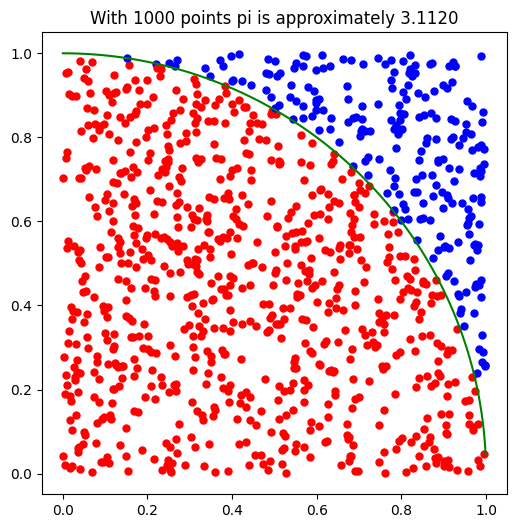






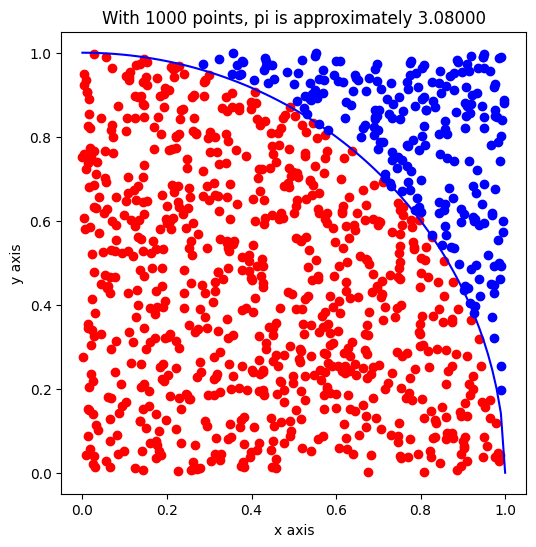

['AUG', 'GUG', 'UUG']
X
['AUGX', 'GUGX', 'UUGX']


In [3]:
import matplotlib.pyplot as plt
import numpy as np  # numpy also has lots of built in math functions
import random
import math

# Set seed for reproducibility
np.random.seed(1)

# Number of points
n = 1000

# Generate random points in the first quadrant
x_pt = np.random.rand(n)
y_pt = np.random.rand(n)

# Calculate if points are inside the unit circle
within_curve = x_pt**2 + y_pt**2 <= 1

# Approximation of pi
pi_approx = 4 * np.sum(within_curve) / n

# Create the plot
plt.figure(figsize=(6,6))
plt.scatter(x_pt[within_curve], y_pt[within_curve], color='red', label='Circle Inner')
plt.scatter(x_pt[~within_curve], y_pt[~within_curve], color='blue', label='Circle Outer')

# Plot the quarter circle
circle = np.linspace(0, 1, 100)
plt.plot(circle, np.sqrt(1 - circle**2), color='blue')

# Add labels and title
plt.title(f'With {n} points, pi is approximately {pi_approx:.5f}')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Show plot
plt.show()


#2.  (10 points)  Days of the week with nicely formatted output

Enhance your code from HW1 about days of the week as follows:



2.1.   Check the user input for valid date numbers (0 < year, 1<=month<=12, and 1<=date <=31.)  If the date is invalid, print an error message.  Otherwise  proceed as in 2.2 below.

2.2.   Compute the day of the week, as you did in HW1, computing an integer value d0.  Convert the integer day (0<=d0<=6) into a string, where 0 means Sunday, 1 means Monday, etc.  Use an if-else structure to accomplish this

2.3  Convert the integer month (1<=m<=12) into a string, where 1 means January, 2 means February, etc.

2.4  Use a format string and a print statement to display the day based on the user input.  Sample output is provided below.



Example 1:  A valid date
```
What is the year: 2024
What is the month (1..12): 11
What is the date (1..31): 28
Thursday, November 28, 2024
```

Example 2: An invalid date
```
What is the year: 2027
What is the month (1..12): 5
What is the date (1..31): 32
Invalid date
```


Example 3: An invalid date that is not caught by my specifications.  You may fix this problem for extra credit (5 points possible to test if each date value is in the correct range for the given month)
```
What is the year: 2024
What is the month (1..12): 2
What is the date (1..31): 30
Friday, February 30, 2024
```











In [9]:
year = int(input('What is the year: '))
month = int(input('Enter the number of the month (1-12): '))
day = int(input('Enter the number day (1-31): '))


# error handling for day value being within correct range of given month and
# accounting for leap years
# month-based day-value error handling done for EXTRA CREDIT

#error handling begins here
error_found = False # flag ensures that code to calculate actual date only executes if no error print statement was executed

if year < 0:
  print('Error! That is an invalid year!')
elif month < 1 or month > 12:
  print('Error! That is an invalid month!')
else:
  for i in range(1,8):
    if month == i and i == 2:
      if year % 100 == 0:
        if year % 400 == 0: # would have to put in 'and' statement with line 20 for test case year 2300 - where output incorrect
          if day < 1 or day > 29:
            print('Error! That is an invalid day of the month! Remember that it is a leap year.')
            error_found = True
      elif year % 4 == 0:
        if day < 1 or day > 29:
          print('Error! That is an invalid day of the month! Remember that it is a leap year.')
          error_found = True
      elif day < 1 or day > 28:
        print('Error! That is an invalid day of the month! Remember that it is February (28 days).')
        error_found = True
    elif month == i and month % 2 != 0:
      if day < 1 or day > 31:
        print('Error! That is an invalid day of the month! This month has 31 days.')
        error_found = True
    elif month == i and month % 2 == 0:
      if day < 1 or day > 30:
        print('Error! That is an invalid day of the month! This month has 30 days.')
        error_found = True
  for i in range(8,13):
    if month == i and month % 2 == 0:
      if day < 1 or day > 31:
        print('Error! That is an invalid day of the month! This month has 31 days.')
        error_found = True
    if month == i and month % 2 != 0:
      if day < 1 or day > 30:
        print('Error! That is an invalid day of the month! This month has 30 days.')
        error_found = True
#error handling ends here

if error_found == False: # only executes calculate_day algorithm if no error from above was located
  y0 = year - (14 - month) // 12
  x = y0 + y0 // 4 - y0 // 100 + y0 // 400
  m0 = month + 12 * ((14 - month) // 12) - 2
  d0 = (day + x + (31 * m0) // 12) % 7
  if d0 == 0:
    d0 = str(d0)
    d0 = 'Sunday'
  elif d0 == 1:
    d0 = str(d0)
    d0 = 'Monday'
  elif d0 == 2:
    d0 = str(d0)
    d0 = 'Tuesday'
  elif d0 == 3:
    d0 = str(d0)
    d0 = 'Wednesday'
  elif d0 == 4:
    d0 = str(d0)
    d0 = 'Thursday'
  elif d0 == 5:
    d0 = str(d0)
    d0 = 'Friday'
  else:
    d0 = str(d0)
    d0 = 'Saturday'

  month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
  for i in range(1,13):
    if i == month:
      month = str(month)
      month = month_list[i-1]

  print(f'{d0}, {month} {day}, {year}')

What is the year: 2024
Enter the number of the month (1-12): 20
Enter the number day (1-31): 12
Error! That is an invalid month!
Tuesday, 20 12, 2024


#3.  (10 points)  Working with quadratic equations


Write a program to use the quadratic formula to solve quadratic equations.

3.1 Prompt the user to enter floating point numbers for the coefficients a, b, c and read in those numbers.  These represent the equation

ax^2 + bx + c = 0


3.2  Display the equation with the coefficients the user chose.

3.3  Use a branching statement to determine of the equation has distinct real roots, a repeated real root, or no real roots.  If real root(s) exist, use the quadratic formula to find the root(s).

3.4  Neatly display the results, correctly labelling distinct real roots, repeated real root and no real roots.  The sample output below will show you what is expected in the output.

Sample outputs:




Example 1: Distinct real roots
```
Enter a: 1
Enter b: -5
Enter c: 6
Finding roots for   1.00 x^2 + -5.00 x + 6.00 = 0
The real roots are 2.00 and 3.00
```

Example 2: No real roots

```
Enter a: 2
Enter b: -3
Enter c: 7
Finding roots for   2.00 x^2 + -3.00 x + 7.00 = 0
No real roots
```


Example 3: Distinct real roots
```
Enter a: 3.1
Enter b: 5.9
Enter c: 2
Finding roots for   3.10 x^2 + 5.90 x + 2.00 = 0
The real roots are -1.46 and -0.44
```


Example 4: Repeated real root
```
Enter a: 1
Enter b: 10
Enter c: 25
Finding roots for   1.00 x^2 + 10.00 x + 25.00 = 0
The repeated real root is -5.00
```






In [ ]:
import math

a = float(input('Enter a: '))
b = float(input('Enter b: '))
c = float(input('Enter c: '))
print(f'Finding roots for: {a:.2f}x^2 + {b:.2f}x + {c:.2f} = 0')

discriminant = b**2 - (4 * a * c)
if discriminant < 0:
  print(f'No real roots')
else:
  plus_root_value = (-(b) + math.sqrt(discriminant)) / (2 * a)
  minus_root_value = (-(b) - math.sqrt(discriminant)) / (2 * a)
  if minus_root_value == plus_root_value:
    print(f'The repeated real root is {plus_root_value:.2f}')
  else:
    print(f'The real roots are {plus_root_value:.2f} and {minus_root_value:.2f}')


Enter a: 1
Enter b: -5
Enter c: 6
Finding roots for: 1.00x^2 + -5.00x + 6.00 = 0
The real roots are 3.00 and 2.00


# 4.  (10 points)  Dice Games

Simulate rolling a pair of fair dice m times and determine the longest consecutive streak of the same number.  The length of the longest streak will depend on the value of m.

Write a program that will simulate rolling a pair of fair 6-sided dice m times and find the longest consecutive streak of the same number that occurs. Report the length of this longest streak.  Think carefully about how to detect a streak.  Use random.seed(1) in your program to ensure we all get the same results.

For example, if m = 10 and this sequence of rolls occurs:

(3, 2), (3, 4), (5, 2), (4, 3), (1, 6), (2, 5), (4, 1), (3, 2), (6, 1), (6, 6)
5, 7, 7, 7, 7, 7, 5, 5, 7, 12
The longest streak has length 5 (the 7, 7, 7, 7, 7)

Sample output with three different m values (using random.seed(1))



```
Rolling the dice 100 times
The longest streak has length 4
The sequence is 8 8 8 8
```

```
Rolling the dice 1000 times
The longest streak has length 5
The sequence is 8 8 8 8 8
```

```
Rolling the dice 10000 times
The longest streak has length 6
The sequence is 7 7 7 7 7 7
```









In [ ]:
# Roll a pair of 6-sided dice n times and report the length of the
# longest consecutive streak of the same number
# Your code for problem 4 goes here
import random

random.seed(1)

input = int(input('Enter how many times you would like to roll the pair of dice: '))
print(f'Rolling the dice {input} time(s).')

dice_output_list = []

i = 0
while i != input:
  dice1 = random.randint(1,6)
  dice2 = random.randint(1,6)
  dice_output_list.append(dice1+dice2)
  i+=1

most_frequent = 0
max_count = 0

for num in dice_output_list:
  count = 0

  for n in dice_output_list: # nested for loop to count iterations of num in list
    if n == num:
      count += 1 # tracks number of times that num appears in dice list

    # updating number with highest freq if greater than past max_count
    if count > max_count:
        max_count = count
        most_frequent = num

most_frequent_list = [most_frequent] * max_count # creates list of number that shows up most frequently for max_count elements
# ex: if most frequent num is 7, then list is filled with 7 for how many ever number of times max_count is


print(f'The longest streak has length {max_count}\nThe sequence is {most_frequent_list}')






Enter how many times you would like to roll the pair of dice: 50
Rolling the dice 50 time(s).
The longest streak has length 9
The sequence is [8, 8, 8, 8, 8, 8, 8, 8, 8]
